In [1]:
import pandas as pd
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt
"""
Draw Chinese characters on plot pics
"""
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

"""
Read washed data
"""
df_AH = pd.read_excel('../data/df_AH_week.xlsx')




/Users/kuzaowuwei/Documents/GitHub/QunatPlayground/src/Stock/Stock.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_AH['DR'] =1 - (self.df_AH['H'])/self.df_AH['A']
/Users/kuzaowuwei/Documents/GitHub/QunatPlayground/src/Stock/Stock.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_AH['H_adjust'] = H
/Users/kuzaowuwei/Documents/GitHub/QunatPlayground/src/Stock/Stock.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

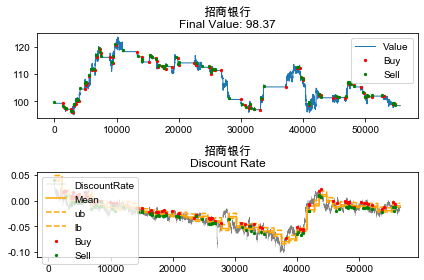

,time,value,buyPoint,sellPoint,signal,close,rtnRate,accRtnRate
0,2021-01-08 09:30:00,100.0,0.0,0.0,0.0,6.755803,NaN,NaN
1,2021-01-08 09:31:00,99.581749,0.0,1.0,-1.0,6.727547,-0.007767,-0.007767
2,2021-01-08 09:32:00,99.223255,0.0,0.0,0.0,6.717272,NaN,NaN
3,2021-01-08 09:33:00,99.223255,0.0,0.0,0.0,6.74039,NaN,NaN
4,2021-01-08 09:34:00,99.223255,0.0,0.0,0.0,6.733968,NaN,NaN
...,...,...,...,...,...,...,...,...
55655,2021-12-31 14:56:00,98.368963,0.0,0.0,0.0,7.793874,NaN,NaN
55656,2021-12-31 14:57:00,98.368963,0.0,0.0,0.0,7.793874,NaN,NaN
55657,2021-12-31 14:58:00,98.368963,0.0,0.0,0.0,7.793874,NaN,NaN
55658,2021-12-31 14:59:00,98.368963,0.0,0.0,0.0,7.793874,NaN,NaN


In [2]:
from Stock import Stock

stock1 = Stock('招商银行',df_AH=df_AH[['time','招商银行','招商银行.1','week_num']],week=True)

stock1.trading_rule(show_transaction=True, is_save=False, show_time=1)


In [3]:
stock1.draw_return()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

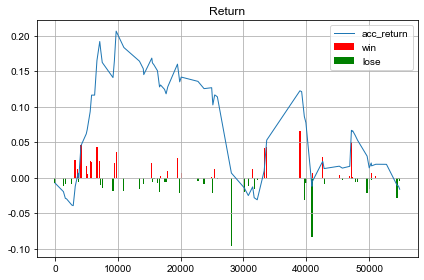

In [5]:
show_bar=True
rtnRate = stock1.record['rtnRate'].values.astype(float)
accRtnRate = stock1.record['accRtnRate'].values.astype(float)
n = len(rtnRate)
if not show_bar:
    plt.subplot(2,1,1)
    plt.plot(np.arange(n)[np.isnan(rtnRate)==False], rtnRate[np.isnan(rtnRate)==False])
    plt.grid()
    plt.xlim(0, n)
    lim = max(rtnRate[np.isnan(rtnRate)==False])
    if abs(min(rtnRate[np.isnan(rtnRate)==False])) > lim:
        lim = abs(min(rtnRate[np.isnan(rtnRate)==False]))
    lim *= 1.1
    plt.ylim(-lim,lim)
    plt.title('Return Rate')
    plt.subplot(2,1,2)
    plt.plot(np.arange(n)[np.isnan(accRtnRate)==False], accRtnRate[np.isnan(accRtnRate)==False])
    plt.grid()
    plt.xlim(0, n)

    plt.title('Accumulative Return Rate')
    
    plt.tight_layout()
    plt.show()
else:
    plt.bar(np.arange(n)[(np.isnan(rtnRate)==False) & (rtnRate>0)], rtnRate[(np.isnan(rtnRate)==False) & (rtnRate>0)], width=200, color='r',label='win')
    plt.bar(np.arange(n)[(np.isnan(rtnRate)==False) & (rtnRate<=0)], rtnRate[(np.isnan(rtnRate)==False) & (rtnRate<=0)], width=200, color='g',label='lose')

    plt.plot(np.arange(n)[np.isnan(accRtnRate)==False], accRtnRate[np.isnan(accRtnRate)==False],linewidth=1,label='acc_return')

    plt.legend()
    plt.title('Return')
    plt.grid()
    plt.tight_layout()
    plt.show()

In [21]:
np.isnan(rtnRate)==False

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [27]:
np.isnan(rtnRate)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [26]:
t.shape

(5,)

In [20]:
t = np.full(5, np.nan)
t[1] = 1
~np.isnan(t)

array([False,  True, False, False, False])

In [12]:
rtnRate = stock1.record['rtnRate'].values
accRtnRate = stock1.record['accRtnRate'].values
n = len(rtnRate)
plt.bar(np.arange(n)[(np.isnan(rtnRate)==False) & (rtnRate>0)], rtnRate[(np.isnan(rtnRate)==False) & (rtnRate>0)], width=200, color='r',label='win')
plt.bar(np.arange(n)[(np.isnan(rtnRate)==False) & (rtnRate<=0)], rtnRate[(np.isnan(rtnRate)==False) & (rtnRate<=0)], width=200, color='g',label='lose')

plt.plot(np.arange(n)[np.isnan(accRtnRate)==False], accRtnRate[np.isnan(accRtnRate)==False],linewidth=1,label='acc_return')

plt.legend()
plt.title('Return')
plt.grid()
plt.tight_layout()
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

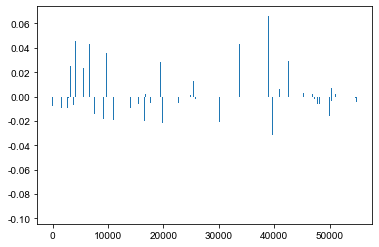

In [24]:
plt.bar(np.arange(n)[np.isnan(rtnRate)==False], rtnRate[np.isnan(rtnRate)==False], width=100)
plt.show()

In [23]:
rtnRate = stock1.record[4].values
accRtnRate = stock1.record[5].values
rtnRate[np.isnan(rtnRate)==False]

array([-7.76745247e-03, -1.20489315e-02, -9.65004786e-03, -6.31663409e-04,
       -9.11060801e-03, -8.25763832e-04,  2.50822898e-02,  3.30033003e-03,
        1.26903553e-02,  5.78512397e-03, -6.59521847e-03,  4.53268092e-02,
        1.59891005e-02,  5.67920363e-03,  2.35004817e-02,  2.14244106e-02,
       -1.16068976e-05,  4.35356268e-02,  2.30670381e-02, -1.03085876e-02,
       -1.45941754e-02, -1.83192643e-02,  2.05072941e-02,  3.60413251e-02,
       -1.90620903e-02, -1.62902699e-02, -9.13221554e-03, -7.17417298e-03,
        2.03117769e-02, -5.75819790e-03, -2.39714414e-03, -7.17417298e-03,
       -1.98196431e-02,  2.45712041e-03, -5.44962653e-03, -5.62891877e-03,
        8.93814724e-03,  2.82093823e-02, -2.14673654e-02,  5.90197023e-03,
       -5.28804028e-03, -9.00142345e-03,  1.13715434e-03, -2.14756822e-02,
        1.27054604e-02, -4.45684692e-04, -1.93696063e-03, -9.62915316e-02,
       -2.05059574e-02, -1.11904587e-02,  1.25858104e-02, -1.55165686e-02,
       -2.99074166e-03,  

In [100]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import time

table = stock1.record[['time','value','signal','rtnRate','accRtnRate']].copy()
# table.signal[0] = 1
table.columns = ['time','value','signal','return','return_acc']
# # 生成样例数据
# table = {}
# table['time'] = ['2021-01-04 09:30', '2021-02-10 09:30', '2021-03-03 09:30', '2021-03-29 09:30', '2021-04-19 09:30', '2021-05-31 09:30']
# table['value'] = [1000, 1005, 1018, 1025, 1030, 1020]
# table['price_H'] = [47.7, 64.7, 59.3, 60.9, 59.2, 71.2]
# table['price_A'] = [41.6, 54.7, 49.2, 50.5, 48.6, 56.5]
# table['signal'] = [1, -1, 1, -1, 1, -1]
# table = pd.DataFrame(table)

# Return = [None] * len(table)
# Return_acc = [None] * len(table)

# for i in range(len(table)):
#     if table['signal'][i] == -1:
#         Return[i] = table['value'][i]/table['value'][i - 1] - 1
#         if i == 1:
#             Return_acc[i] = Return[i]
#         else:
#             Return_acc[i] = Return[i] + Return_acc[i - 2]

# Return = pd.DataFrame(Return)
# Return_acc = pd.DataFrame(Return_acc)
# table = pd.merge(table, Return, left_index=True, right_index=True)
# table = pd.merge(table, Return_acc, left_index=True, right_index=True)
# table = table.rename(columns= {'0_x': 'return', '0_y': 'return_acc'})

# 计算年化收益率
# 表格中的时间格式为YY-mm-dd HH:MM
# 返回年化收益率的pandas数据
def annualized_return(table):
    Annualized_return = [None] * len(table)
    for i in range(len(table)):
        if table['signal'][i] == -1:
            if i == 0:
                continue
            start_time = parse(table['time'][i - 1])
            end_time = parse(table['time'][i])
            Annualized_return[i] = table['return'][i] / (end_time - start_time).total_seconds() * 60 * 60 * 24 * 365

    return pd.DataFrame(Annualized_return)

# 计算累计年化收益率
# 表格中的时间格式为YY-mm-dd HH:MM
# 返回累计年化收益率的pandas数据
def annualized_return_acc(table):
    Annualized_return_acc = [None] * len(table)
    for i in range(len(table)):
        if i == 0:
            continue
        if table['signal'][i] == -1:
            start_time = parse(table['time'][i - 1])
            end_time = parse(table['time'][i])
            Annualized_return_acc[i] = table['return_acc'][i] / (end_time - start_time).total_seconds() * 60 * 60 * 24 * 365
    return pd.DataFrame(Annualized_return_acc)

# 计算最大回撤及其开始时间与结束时间
# 返回值为最大回撤及其开始时间与结束时间
def maxdown(table):
    Maxdown = 0
    for i in range(len(table)):
        if table['signal'][i] == -1:
            if i <= 1:
                continue
            # profit = table['return_acc'][i] - table['return_acc'][i - 1]
            profit = table['return_acc'][i] - table['return_acc'][i-2]
            if profit < Maxdown:
                Maxdown = profit
                start_time = table['time'][i - 1]
                end_time = table['time'][i]
    return Maxdown, start_time, end_time

# 统计盈亏次数，计算盈亏比
# 返回值为盈利次数，亏损次数与盈亏次数比
def count_profit_loss(table):
    profit_times = 0
    loss_tims = 0
    for i in range(len(table)):
        if table['return'][i] > 0:
            profit_times += 1
        if table['return'][i] < 0:
            loss_tims += 1
    profit_loss_rate = profit_times / loss_tims * 1.0
    return profit_times, loss_tims, profit_loss_rate

# 计算最大收益率
def max_profit(table):
    return table['return'][table['return'].astype(float).argmax()]

# 计算最大亏损率
def max_loss(table):
    return table['return'][table['return'].astype(float).argmin()]

# 利用滑动窗口计算收益率的移动平均
# 返回值为增加了平均收益率的table
def MA(table):
    # 滑动窗口大小设为4，意为取最近2次交易的收益率做平均
    window_size = 4
    table['process_return'] = table['return'].fillna(0)
    # 滑动窗口计算平均收益率
    table['MA'] = table['process_return'].rolling(window_size).mean()
    # 去除重复的值
    table['MA'] = table.MA.mask(table.MA.diff().eq(0))
    table = table.drop('process_return', axis=1)
    return table

# 择时策略
# 对比平均收益率与单次交易的收益率生成择时
# 返回值为新的交易策略
def timing_strategy(table):
    table['operation'] = table['signal']
    for i in range(len(table)):
        if table['return'][i] < table['MA'][i]:
            table['operation'][i] = 0
            table['operation'][i - 1] = 0
    return table
table = table.drop(table[table['signal']==0].index).reset_index(drop=True)
table

,time,value,signal,return,return_acc
0,2021-01-08 09:31:00,99.581749,-1.0,-0.007767,-0.007767
1,2021-01-15 10:59:00,99.223255,1.0,NaN,NaN
2,2021-01-15 11:26:00,98.381895,-1.0,-0.012049,-0.019723
3,2021-01-18 13:12:00,98.027721,1.0,NaN,NaN
4,2021-01-18 13:57:00,97.432505,-1.0,-0.00965,-0.029183
...,...,...,...,...,...
156,2021-12-24 09:31:00,99.297457,-1.0,-0.028791,-0.0106
157,2021-12-24 09:55:00,98.939986,1.0,NaN,NaN
158,2021-12-28 09:31:00,99.161539,-1.0,-0.001369,-0.011954
159,2021-12-28 10:23:00,98.804557,1.0,NaN,NaN


In [103]:
MA(table)
timing_strategy(table)

/Users/kuzaowuwei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kuzaowuwei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,time,value,signal,return,return_acc,process_return,MA,operation
0,2021-01-08 09:31:00,99.581749,-1.0,-0.007767,-0.007767,-0.007767,NaN,-1.0
1,2021-01-15 10:59:00,99.223255,1.0,NaN,NaN,0.000000,NaN,1.0
2,2021-01-15 11:26:00,98.381895,-1.0,-0.012049,-0.019723,-0.012049,NaN,-1.0
3,2021-01-18 13:12:00,98.027721,1.0,NaN,NaN,0.000000,-0.004954,0
4,2021-01-18 13:57:00,97.432505,-1.0,-0.00965,-0.029183,-0.009650,-0.005425,0
...,...,...,...,...,...,...,...,...
156,2021-12-24 09:31:00,99.297457,-1.0,-0.028791,-0.0106,-0.028791,-0.007224,0
157,2021-12-24 09:55:00,98.939986,1.0,NaN,NaN,0.000000,NaN,1.0
158,2021-12-28 09:31:00,99.161539,-1.0,-0.001369,-0.011954,-0.001369,-0.007540,-1.0
159,2021-12-28 10:23:00,98.804557,1.0,NaN,NaN,0.000000,NaN,0


In [109]:
# 生成样例数据
table = {}
table['time'] = ['2021-01-04 09:30', '2021-02-10 09:30', '2021-03-03 09:30', '2021-03-29 09:30', '2021-04-19 09:30', '2021-05-31 09:30']
table['value'] = [1000, 1005, 1018, 1025, 1030, 1020]
table['price_H'] = [47.7, 64.7, 59.3, 60.9, 59.2, 71.2]
table['price_A'] = [41.6, 54.7, 49.2, 50.5, 48.6, 56.5]
table['signal'] = [1, -1, 1, -1, 1, -1]
table = pd.DataFrame(table)

Return = [None] * len(table)
Return_acc = [None] * len(table)

for i in range(len(table)):
    if table['signal'][i] == -1:
        Return[i] = table['value'][i]/table['value'][i - 1] - 1
        if i == 1:
            Return_acc[i] = Return[i]
        else:
            Return_acc[i] = Return[i] + Return_acc[i - 2]

Return = pd.DataFrame(Return)
Return_acc = pd.DataFrame(Return_acc)
table = pd.merge(table, Return, left_index=True, right_index=True)
table = pd.merge(table, Return_acc, left_index=True, right_index=True)
table = table.rename(columns= {'0_x': 'return', '0_y': 'return_acc'})


In [121]:
price = table['price_H'].values.copy()
op = table['signal'].values.copy()


[ 2.  64.7 59.3 60.9 59.2 71.2]


In [111]:
table.keys()

Index(['time', 'value', 'price_H', 'price_A', 'signal', 'return',
       'return_acc'],
      dtype='object')

In [ ]:
def cal_return_with_op(price, op):

    

